1. What is data cleaning


2. Why do we need to clean our data


3. What are the steps in data cleaning


     i. Missing Values
        a. checking them
        b. Statistical imputation
        c. Multiple Imputation by Chained Equations
        
     ii. Encoding
        a. Nominal
            ai. One-hot Encoding
            aii. Frequency/ Count encoding
            aiii. Target mean encoding
            
        b. Ordinal
            
            
     iii. Outlier Detection
        a. Why do we need to detect outliers
        b. How do we detect them
        c How do we tackle them
            ai. Zscore
            aii. Inter Quartile Range
            aiii. percentiles
            
        d. Why do we tackle them that way.
        
        
4. Automation: Designing a pipeline for data cleaning.

In [1]:
# let's start with importing our libraries and setting our parameters.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize']=  [5,5]
sns.set_context(context= 'paper', font_scale= 1, rc= {'font': 'monospace'})
plt.style.use('seaborn-darkgrid')

In [2]:
data= pd.read_csv('missing_values_demo.csv')
data.shape

(25053, 121)

In [3]:
data.head()

,BCT_CODBUR,CTR_MATFIS,CTR_CATEGO_X,FJU_CODFJU,CTR_CESSAT,ACT_CODACT,CTR_OBLDIR,CTR_OBLACP,CTR_OBLRES,CTR_OBLFOP,...,target,FAC_MNTPRI_F,FAC_MFODEC_F,FAC_MNTDCO_F,FAC_MNTTVA_F,FAC_MNTPRI_C,FAC_MFODEC_C,FAC_MNTDCO_C,FAC_MNTTVA_C,id
0,49,14185,P,99,1,6101,4,2,2,2,...,13.575957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id0
1,221,6032,P,99,0,6271,8,2,1,1,...,11.692894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id1
2,181,8907,P,99,0,6102,4,2,2,2,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id2
3,252,5783,M,22,0,4403,4,2,2,2,...,16.237871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id3
4,234,1477,P,99,0,6312,8,2,2,1,...,13.399983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train_id4


#### MISSING VALUES

In [4]:
df= data.copy()

In [5]:
#Removes columns with Nan values percentage greater than thresh
def missing_removal(df, thresh, confirm= None):
    holder= {}
    for col in df.columns:
        rate= df[col].isnull().sum() / df.shape[0]
        if rate > thresh:
            holder[col]= rate
    if confirm==True:
        df.drop(columns= [i for i in holder], inplace= True)
        return df
    else:
        print(f'Number of columns that have Nan values above the thresh specified:{len(holder)}')
        return holder

In [6]:
missing_removal(df= df, thresh= 0.5, confirm= False)

Number of columns that have Nan values above the thresh specified:30


{'ADB_MNTORD': 0.7480940406338562,
 'SND_MNTPRD_I': 0.825489961282082,
 'SND_MNTTVA_I': 0.825489961282082,
 'SND_MNTDRC_I': 0.825489961282082,
 'SND_MNTAVA_I': 0.825489961282082,
 'SND_MNTTAX_I': 0.825489961282082,
 'SND_MNTPAY_I': 0.825489961282082,
 'SND_MNTAIR_I': 0.825489961282082,
 'SND_MNTPRD_E': 0.9424021075320321,
 'SND_MNTTVA_E': 0.9424021075320321,
 'SND_MNTDRC_E': 0.9424021075320321,
 'SND_MNTAVA_E': 0.9424021075320321,
 'SND_MNTTAX_E': 0.9424021075320321,
 'SND_MNTPAY_E': 0.9424021075320321,
 'SND_MNTAIR_E': 0.9424021075320321,
 'SND_MNTPRD_A': 0.863409571707979,
 'SND_MNTTVA_A': 0.863409571707979,
 'SND_MNTDRC_A': 0.863409571707979,
 'SND_MNTAVA_A': 0.863409571707979,
 'SND_MNTTAX_A': 0.863409571707979,
 'SND_MNTPAY_A': 0.863409571707979,
 'SND_MNTAIR_A': 0.863409571707979,
 'FAC_MNTPRI_F': 0.9156588033369257,
 'FAC_MFODEC_F': 0.9156588033369257,
 'FAC_MNTDCO_F': 0.9156588033369257,
 'FAC_MNTTVA_F': 0.9156588033369257,
 'FAC_MNTPRI_C': 0.9012493513750848,
 'FAC_MFODEC_C': 

In [7]:
df= missing_removal(df= df, thresh= 0.5, confirm= True)

In [8]:
df.shape

(25053, 91)

##### STATISTICAL IMPUTATION

In [9]:
%%time
from sklearn.impute import SimpleImputer
# store the columns
cols= df.columns

#instantiate imputer
imputer= SimpleImputer(strategy= 'most_frequent')
df= imputer.fit_transform(df)

# convert back to dataframe
df= pd.DataFrame(df, columns= cols)

Wall time: 3.85 s


In [10]:
missing_removal(df= df, thresh= 0.5, confirm= False)

Number of columns that have Nan values above the thresh specified:0


{}

#### MULTIPLE IMPUTATION OF CHAINED EQUATION (MICE)

In [11]:
df_imp= data[:1000].select_dtypes(exclude= 'object').copy()

In [12]:
%%time
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# store the columns
cols= df_imp.columns

#instantiate imputer
imputer= IterativeImputer(max_iter= 3)
df_imp= imputer.fit_transform(df_imp)

# convert back to dataframe
df_imp= pd.DataFrame(df_imp, columns= cols)

Wall time: 14.7 s


C:\Users\USER\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [13]:
missing_removal(df= df_imp, thresh= 0.5, confirm= False)

Number of columns that have Nan values above the thresh specified:0


{}

#### ENCODING

In [14]:
data= pd.read_csv('encoding_demo.csv')
data.shape

(107833, 10)

#### Drop ID column, i would've dropped the target column also, but there's a type of encoding that uses the target

In [15]:
data.drop(columns= 'ID', inplace= True)

In [16]:
data.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


#### Run a loop to know the number of categories in each column (There are times where columns represented with numbers are actually categorical. Imagine a data of 20,000 rows having just 5 or 10 unique numbers in a particular column, that's obviously a categorical column)

In [17]:
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

DATOP: 1011
FLTID: 1861
DEPSTN: 132
ARRSTN: 128
STD: 81697
STA: 85136
STATUS: 5
AC: 68
target: 968


#### From the above, we're quite sure columns DEPSTN, ARRSTN, STATUS and AC are categorical

#### Let's start with STATUS since it has just 5 columns.
For a column like this, one-hot encoding is the best.

In [18]:
# copy dataframe:
dataone_hot= data.copy()

dataone_hot= pd.get_dummies(dataone_hot, columns= ['STATUS'], drop_first= True)
dataone_hot.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,AC,target,STATUS_DEL,STATUS_DEP,STATUS_RTR,STATUS_SCH
0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,TU 32AIMN,260.0,0,0,0,0
1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,TU 31BIMO,20.0,0,0,0,0
2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,TU 32AIMN,0.0,0,0,0,0
3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,TU 736IOK,0.0,0,0,0,0
4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,TU 320IMU,22.0,0,0,0,0


#### Now for features/ columns that have many categories, we try frequency encoding. We'll define our own function for the task

In [19]:
# Frequency encoding
def freq_enc(df, cols):
    for col in cols:
        df[col]= df[col].map(round(df[col].value_counts()/len(df),4))
    return df

# count encoding
def count_enc(df, cols):
    for col in cols:
        df[col]= df[col].map(round(df[col].value_counts()))
    return df

In [20]:
# copy data
data_freq= data.copy()

data_freq= freq_enc(df= data_freq, cols= ['DEPSTN', 'ARRSTN','AC' ])
data_freq.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,0.0125,0.3948,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,0.0353,260.0
1,2016-01-13,TU 0757,0.0142,0.3948,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,0.0270,20.0
2,2016-01-16,TU 0214,0.3943,0.0134,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,0.0353,0.0
3,2016-01-17,TU 0480,0.0951,0.0050,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,0.0258,0.0
4,2016-01-17,TU 0338,0.3943,0.0146,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,0.0438,22.0


#### Now target mean encoding. 
* Simply calculate the mean of the target column for each category and map it to each category in the column
* we'll write our own function for this too

In [21]:
# target mean encoding
def target_mean_enc(df, cols, target_col):
    mean_holder= {}
    for col in cols:
        col_mean= {}
        cat= list(df[col].unique())
        for i in cat:
            data= df[df[col]== i]
            mean= np.mean(data[target_col])
            col_mean[i]= mean
        mean_holder[col]= col_mean
    return mean_holder

In [22]:
means= target_mean_enc(df= data, cols= ['DEPSTN', 'ARRSTN','AC' ], target_col= 'target')
means

{'DEPSTN': {'CMN': 49.48480355819125,
  'MXP': 54.55019556714472,
  'TUN': 44.489722966934764,
  'DJE': 28.30101443620757,
  'TLS': 72.31411764705882,
  'IST': 95.54160887656033,
  'ORY': 51.76313841598816,
  'MIR': 34.521341463414636,
  'BRU': 41.151493080844865,
  'ABJ': 77.80194410692589,
  'VCE': 52.02552204176334,
  'AMS': 74.92909535452323,
  'FRA': 49.341074020319304,
  'BCN': 50.481327800829874,
  'JED': 95.75659050966608,
  'ALG': 80.45454545454545,
  'LIS': 54.8266253869969,
  'SXB': 72.50615114235501,
  'LYS': 74.37574215436811,
  'OUA': 66.0068493150685,
  'LGW': 52.981818181818184,
  'BEY': 30.625,
  'NCE': 48.71890435563538,
  'OPO': 43.05797101449275,
  'MRS': 57.41476274165202,
  'DUS': 41.72563176895307,
  'SFA': 32.959651035986916,
  'FCO': 39.13507109004739,
  'CDG': 81.2012142237641,
  'NKC': 110.58703071672355,
  'NTE': 64.24444444444444,
  'ZRH': 38.153225806451616,
  'GVA': 47.19120287253142,
  'OUD': 16.644970414201183,
  'MUC': 41.63368983957219,
  'SXF': 61.94

About the above process;

a. You know the test data doesn't have a target column, it's pertinent that we retain the means so that we can apply them to the test data, that's why this function didn't just transform them straight up like freq_enc did.

b. What did this function output gan sef, leemao.
* The function returned a dictionary of dictionaries. The first dictionary has the columns we passed as keys which makes sense right?. The second level dictionaries, i.e the keys to the first dictionaries had keys that are simply the categories in them (the second level dictionaries keys are the unique categories in each column)
    
    
    

       
 c. How do we use this. Simple, we use the map function, shikena

In [23]:
# Copy df
data_target_mean= data.copy()
for col in ['DEPSTN', 'ARRSTN','AC' ]:
    data_target_mean[col]= data_target_mean[col].map(means[col])
    
data_target_mean.head()

,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,2016-01-03,TU 0712,49.484804,50.364629,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,52.669730,260.0
1,2016-01-13,TU 0757,54.550196,50.364629,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,35.076844,20.0
2,2016-01-16,TU 0214,44.489723,89.351595,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,52.669730,0.0
3,2016-01-17,TU 0480,28.301014,48.372222,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,33.682699,0.0
4,2016-01-17,TU 0338,44.489723,70.114431,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,58.867697,22.0


#### Lastly, ordinal encoding.
This one is quite easy. We'll write a dataframe for it

In [24]:
df= pd.DataFrame({'Random': np.random.rand(10), 'size': ['small', 'big', 'small', 'medium', 'big', 'small', 
                                                        'medium', 'medium', 'big', 'big']})
df

,Random,size
0,0.330349,small
1,0.873610,big
2,0.148391,small
3,0.735745,medium
4,0.306169,big
5,0.655549,small
6,0.848357,medium
7,0.705416,medium
8,0.705338,big
9,0.479950,big


In [25]:
# we could just say 
df_first= df.copy()

df_first['size']= df_first['size'].map({'small':1, 'medium':2, 'big':3})
df_first

,Random,size
0,0.330349,1
1,0.873610,3
2,0.148391,1
3,0.735745,2
4,0.306169,3
5,0.655549,1
6,0.848357,2
7,0.705416,2
8,0.705338,3
9,0.479950,3


In [26]:
# or
df_sec= df.copy()

df_sec['size']= df_sec['size'].replace(['small', 'medium', 'big'], [1,2,3])
df_sec

,Random,size
0,0.330349,1
1,0.873610,3
2,0.148391,1
3,0.735745,2
4,0.306169,3
5,0.655549,1
6,0.848357,2
7,0.705416,2
8,0.705338,3
9,0.479950,3


***Note:***

There's a package named category_encoders that can implement over 10 types of encoding. It's just like your normal scikit-learn packages (i.e fit and transform).

I'd have used it in this demo, but i guess just like me, you like to get your hands dirty with your own implementations.

to install, simply type in 'pip install category_encoders'

Other types of encoding i didn't talk about are;
* Hash encoding
* weight of evidence encoding
* binary encoding
* leave one out encoding
* Ordered integer encoding
* backward difference encoding.

 and many more

watchout for them in an article i'll be releasing soon

#### Outliers Detection

In [27]:
data= pd.read_csv('outliers_demo.csv')
data.shape

(13200, 7)

In [28]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#### We'll only use the price_per_sqft column of this data for our analysis

##### HOW TO DETECT OUTLIERS
* Box plot
* Scatter plot / regression plots
* Distribution plot
* Zscore
* Interquartile range
* Percentile

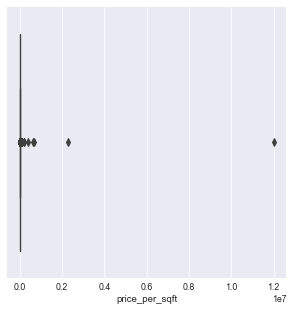

In [29]:
sns.boxplot(data['price_per_sqft'])

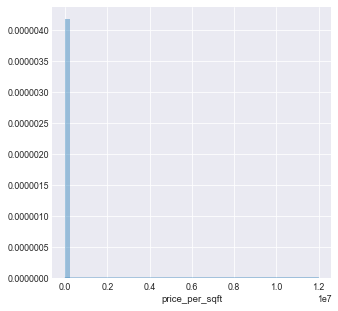

In [30]:
sns.distplot(data['price_per_sqft'])

In [31]:
datag=data.copy()
datag['index']= datag.index
datag

,location,size,total_sqft,bath,price,bhk,price_per_sqft,index
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,1
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,2
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,4
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,13195
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,13196
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,13197
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,13198


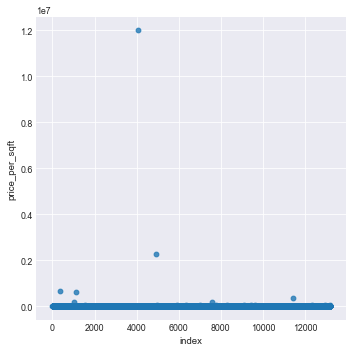

In [32]:
sns.lmplot(x= 'index', y= 'price_per_sqft', data= datag)

#### Detecting and fixing Outliers
Generally, When we find outliers, we've three options, either to discard or leave or fix.

* We discard when we have a large data
* We fix when we don't have a large data. The most common way to fix is to force those outliers to be equal to the mean
* We leave when such outliers are normalities in our data and we expect them in the future

The idea behind replacing the outliers with the mean value is because that way, our distribution goes closer to being a normal distribution, which most models love

#### Z score
Z Score is a number that describes how many standard deviations you're from the mean

Z= (X - mean) / std

 In this method, we simply consider values that are beyond a specific number of standard deviations from the mean (zscore) as outliers. It's common to use 3
 
upper_limit= data[col].mean() + 3 *  data[col].std()

lower_limit= data[col].mean() - 3 *  data[col].std()

In [33]:
upper_limit= data.price_per_sqft.mean() + 3 *  data.price_per_sqft.std()
lower_limit= data.price_per_sqft.mean() - 3 *  data.price_per_sqft.std()
upper_limit, lower_limit

(328101.8177267496, -312261.1442419011)

In [34]:
# let's check the upper outliers
data[(data.price_per_sqft >upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [35]:
# let's check the lower outliers
data[(data.price_per_sqft <lower_limit)]
# There's no lower outlier.

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [36]:
# We write a function that can help us implement Zscore
def outlier_zscore(df):
    df= df.select_dtypes(include= 'number').copy()
    for col in df.columns:
        mean, std = df[col].mean(), df[col].std()
        upper=  mean+ 3*std  
        lower= mean - 3*std
        df[col][df[col] > upper]= mean
        df[col][df[col] < lower]= mean
    return df

In [37]:
# let's implement
#copy data 
df_zscore= data.copy()
df_zscore= outlier_zscore(df_zscore)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
# let's check again
df_zscore[(df_zscore.price_per_sqft >upper_limit)]

,total_sqft,bath,price,bhk,price_per_sqft


#### Interquartile range (IQR)
Interquartle range is used to measure variabilty by dividing the dataset into quartiles.

In [39]:
q1= data['price_per_sqft'].quantile(0.25)
q3= data['price_per_sqft'].quantile(0.75)
iqr= q3 - q1
upper_limit= q3 + (1.5*iqr)
ower_limit= q1 - (1.5*iqr)
upper_limit, lower_limit

(11892.0, -312261.1442419011)

In [40]:
# let's check the upper outliers
data[(data.price_per_sqft >upper_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [41]:
# let's check the lower outliers
data[(data.price_per_sqft <lower_limit)]
# There's no lower outlier.

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [42]:
# We write a function that can help us implement iqr
def outlier_iqr(df):
    df= df.select_dtypes(include= 'number').copy()
    for col in df.columns:
        q1= df[col].quantile(0.25)
        q3= df[col].quantile(0.75)
        iqr= q3 - q1
        lower= q1 - (1.5 * iqr)
        upper= q3 + (1.5 * iqr)
        df[col][df[col] > upper]= df[col].mean()
        df[col][df[col] < lower]= df[col].mean()
    return df

In [43]:
# let's implement iqr
#copy data 
df_iqr= data.copy()
df_iqr= outlier_iqr(df_iqr)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [44]:
# let's check again
df_iqr[(df_iqr.price_per_sqft >upper_limit)]

,total_sqft,bath,price,bhk,price_per_sqft


#### percentile
* This is simply seting a threshold for a data point to be considered an outlier based on your understanding of the data (from EDA)

In [45]:
max_thresh= data['price_per_sqft'].quantile(0.95) #95%
max_thresh

15312.099999999984

In [46]:
data[data['price_per_sqft']>max_thresh]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [49]:
# lower quantile, let's take 5% as a lower outlier i.e 5/100 =0.05
min_thresh= data['price_per_sqft'].quantile(0.05)
min_thresh

3107.8500000000004

In [50]:
data[data['price_per_sqft']<min_thresh]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
89,Electronic City,2 BHK,1000.0,2.0,28.88,2,2888
99,Chandapura,2 BHK,650.0,1.0,17.00,2,2615
111,Electronic City,3 BHK,1530.0,2.0,45.90,3,3000
...,...,...,...,...,...,...,...
13101,Attibele,1 BHK,520.0,1.0,15.00,1,2884
13105,Chandapura,1 BHK,520.0,1.0,14.04,1,2700
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [51]:
# To remove and keep the non- outliers,
data= data[(data['price_per_sqft']< max_thresh) & (data['price_per_sqft']> min_thresh)]
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


#### Automation: Designing a pipeline for data cleaning.
Still working on this, would release as soon as i'm done. Kindly share your sure suggestions, if you've any. Thank you